In [2]:
import time
import Assign as RSA
import attack as attak
import matplotlib.pyplot as plt

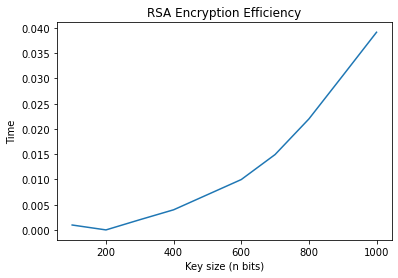

In [3]:
plain='dummy text'
key_sizes=[100,200,300,400,500,600,700,800,900,1000]
e_array=[]
n_array=[]
d_array=[]
time_arr=[]
for i in key_sizes:
    e,d,n,p,q=RSA.gen_key(i)
    e_array.append(e)
    n_array.append(n)
    d_array.append(d)

enc_messages=[]
for e,n in zip(e_array,n_array):
    groups=RSA.group_plaintext(plain)
    # print(groups)
    enc_message=[]
    start_time = time.time()
    for group in groups:
        enc_group=RSA.rsa_encrypt(n,group,e)
        enc_message.append(enc_group)
    end_time = time.time()
    time_taken = end_time - start_time
    time_arr.append(time_taken)
    enc_messages.append(enc_message)
# print(time_arr)
plt.plot(key_sizes, time_arr)
plt.xlabel("Key size (n bits)")
plt.ylabel("Time")
plt.title("RSA Encryption Efficiency")
plt.show()



[[730994758, 269401810]]
[730994758, 269401810]


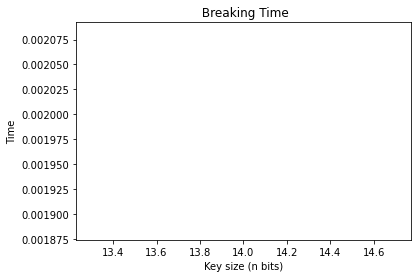

In [4]:
plain='dummy text'
# key_sizes=[14,15,16,17,18,19,20,21,22]
key_sizes=[14]
e_array=[]
n_array=[]
d_array=[]
time_arr=[]

for i in key_sizes:
    e,d,n,p,q=RSA.gen_key(i)
    e_array.append(e)
    n_array.append(n)
    d_array.append(d)

enc_messages=[]
for e,n in zip(e_array,n_array):
    groups=RSA.group_plaintext(plain)
    # print(groups)
    enc_message=[]
    for group in groups:
        enc_group=RSA.rsa_encrypt(n,group,e)
        enc_message.append(enc_group)
    enc_messages.append(enc_message)
    
print(enc_messages)
dec_messages=[]
for n,e,ciphers in zip(n_array,e_array,enc_messages):
    # dec_message=''
    # for cipher in ciphers:
    print(ciphers)

    start_time = time.time()
    dec_message,v=attak.attack(ciphers,n,e,plain)
    end_time = time.time()
    time_taken = end_time - start_time
    time_arr.append(time_taken)
    # dec_message+=dec_group
    dec_messages.append(dec_message)
# print(dec_messages)
# print(time_arr)
plt.plot(key_sizes, time_arr)
plt.xlabel("Key size (n bits)")
plt.ylabel("Time")
plt.title(" Breaking Time")
plt.show()
